In [6]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = "Latin Modern Roman"
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = "\\usepackage{mathtools}, \\usepackage{siunitx}"

def add_num_format(x):
    return '\\num{'+ str(x) + '}'

def write_latex(self, target):
    return Path(target).write_text(self.to_latex(escape=False, float_format=add_num_format))

pd.DataFrame.write_latex = write_latex 

In [7]:
data = pd.DataFrame()
data['x'] = sp.linspace(0, 100, 1000)
data['y'] = -1/(10*data.x) * sp.log(sp.sinh(data.x)**10 + sp.cosh(data.x)**10)
#data.write_latex('data/table1.tex')
data.head()

,x,y
0,0.0000,NaN
1,0.1001,-0.049967
2,0.2002,-0.099439
3,0.3003,-0.147948
4,0.4004,-0.195085


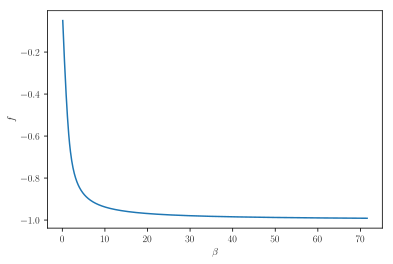

In [10]:
fig, ax = plt.subplots()
ax.plot(data.x, data.y)
ax.set_xlabel("$\\beta$")
ax.set_ylabel("$f$")
fig.savefig('Elibre.pdf')

In [9]:
1/(sp.log(1 + sp.sqrt(2))/2)

2.269185314213022